<font size="20">Geospatial Analysis & Visualization w/ Python</font>

# Step 0) Setup
* To get started, we need to import all the packages we'll use.

In [301]:
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
%matplotlib notebook

# Step 1) Importing our data
* We'll load the Police Killing Data as a "DataFrame" using pandas


* Then we'll convert it into a "GeoDataFrame" using Geopandas
    * To do this, we must assign the "geometry".  In this case its point data, and the coordinates are in lat/long
    
    
* Then we need to assign a Coordiante Reference System (CRS) manually
    * ESPG is a standardized code that is used to represent CRSs.
    * 'espg:4326' is for the refers to the WGS 1984 datum, which our latitude/longitude data is based in.
        * This is a CRS that is widely used by many web-based platforms because like Google Maps and Mapbox
        * The original only had addresses, not coordinates, so we used a webservice (Mapbox) to generate the coordinates of our addresses
        
        
* Once we have the data loaded, calling .head() will give us a "preview" of our dataset

In [302]:
# We import the Police Killings file, and set the incident ID as the index
police_Killings_Tabular = pd.read_csv('Data/PoliceKillings.csv',
                                      parse_dates=['date'],
                                      index_col=['id_incident']
                                     )

# We can then convert the pandas dataframe into a geopandas "GeodataFrame"
police_Killings = gpd.GeoDataFrame(police_Killings_Tabular,
    geometry=gpd.points_from_xy(police_Killings_Tabular.longitude,
                                police_Killings_Tabular.latitude
                               )
                                  )

# Now we can assign a CRS
WGS_1984={'init' :'epsg:4326'}
police_Killings.crs = WGS_1984

# Lets sort the incidents by date and then take a quick look.
police_Killings=police_Killings.sort_values(by='date')
police_Killings.head()

,date,date.1,day_week,prov,city_town,postal_code,location_type,id_victim,Name,age,...,substance_abuse,summary,Department,charge_type,Charges,Officers Involved,latitude,longitude,geocoding_Notes,geometry
id_incident,,,,,,,,,,,,,,,,,,,,,
416,2000-01-01,2000-01-01,Sat,ON,Toronto,M5B 1W8,Urban,0416-V1,*****,26.0,...,No,Henry Musaka entered a hospital emergency room...,Toronto Police Service,None,No,0416-P1,43.65363,-79.37736,NaN,POINT (-79.37736 43.65363)
170,2000-01-07,2000-01-07,Fri,AB,Edmonton,T5R 1A1,Urban,0170-V1,*****,28.0,...,Yes,"Long Duy Hoang, also known as ‚ÄúCrazy Jimmy,‚...",Edmonton Police Service,None,No,0170-P1,53.52191,-113.57569,NaN,POINT (-113.57569 53.52191)
413,2000-01-30,2000-01-30,Sun,ON,Toronto,M4X 1C7,Urban,0413-V1,*****,49.0,...,Yes,"Officers responding to ""gun call"" at a rooming...",Toronto Police Service,None,No,0413-P1,43.66646,-79.37113,NaN,POINT (-79.37113 43.66646)
435,2000-04-07,2000-04-07,Fri,ON,Mississauga,L4T 1T8,Urban,0435-V1,*****,48.0,...,Yes,Police were responding to a 911 call reporting...,Peel Regional Police,None,No,0435-P1,43.72063,-79.63149,NaN,POINT (-79.63149 43.72063)
266,2000-04-11,2000-04-11,Tue,BC,Williams Lake,V2G 1N1,Urban,0266-V1,*****,67.0,...,Yes,There was a struggle between Paulsey (Paul) Al...,RCMP,None,No,0266-P1,52.12859,-122.13387,NaN,POINT (-122.13387 52.12859)


### Now we'll load some data from the 2016 Census

* We have a tabular dataset of population data.

* We'll load it using pandas

In [303]:
# We'll import the tabualr census data with pandas
Census_Tabular = pd.read_csv('Data/Census.csv',index_col=['PRUID'])
Census_Tabular.head()

,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Caucasian
PRUID,,,,,,,,,,,,,,,,
1,CA,35151728,1924635,1577060,1198545,780125,447320,523235,313260,264305,188710,92920,132090,232375,1673780,25803368
10,NL,519716,2645,2325,2350,1385,635,1375,335,220,75,60,145,255,45725,462186
11,PE,142907,925,2570,825,670,255,585,145,215,210,110,50,85,2735,133527
12,NS,923598,7905,8645,21910,3400,1685,8115,1195,1540,1540,695,635,1390,51490,813453
13,NB,747101,2535,3925,6995,1975,1285,2960,1230,735,1685,230,300,680,29380,693186


### We also have a provincial boundary shapefile

* Shapefile are used to store georphric data.  They already have projections and coordiantes associated with them.
    * Geopandas has similar functionality to pandas and we can use it to import shapefiles.  But the read_file() method had less options, so we have to set the index manually.

In [304]:
# We'll import provincial boundaries using geopandas
Provincial_Boundaries = gpd.read_file('Data/Provincial_Boundaries.shp').set_index('PRUID')
Provincial_Boundaries.head()

,PRNAME,geometry
PRUID,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366..."
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717..."
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763..."
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."


# Step 2) Joining our census data

* This will let us map the disparity by province and do a more detailed analysis

* PRUID is a "unique identifier" that represents the provinces.

    * Since both have the PRUID set as the index, we don't need to specify a join key.

In [305]:
Test_Join = Provincial_Boundaries.join(Census_Tabular)
Test_Join.head()

,PRNAME,geometry,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Caucasian
PRUID,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# But our join fails :(

* ### Notice the NaN values.

* NaN represetns missing data values
    * Lets look at the index for both files?  Maybe we have a datatype missmatch?

In [306]:
print(Provincial_Boundaries.index.dtype)
print(Census_Tabular.index.dtype)

object
int64


### Sure enough!  The Provincial_Boundaries index is an "object", not an integer.

* We can fix that easily and then do the join!
    * We just need to change the datatype of the Provincial_Boundaries layer.

### We can assign the datatype using the .astype() function.

### But datatype do we assign?
* Hint The anser is in the cell above!!

In [307]:
dtype = 'int64'
Provincial_Boundaries.index = Provincial_Boundaries.index.astype(dtype)
Provincial_Data = Provincial_Boundaries.join(Census_Tabular)
Provincial_Data.head()

,PRNAME,geometry,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Caucasian
PRUID,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL,519716,2645,2325,2350,1385,635,1375,335,220,75,60,145,255,45725,462186
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366...",PE,142907,925,2570,825,670,255,585,145,215,210,110,50,85,2735,133527
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717...",NS,923598,7905,8645,21910,3400,1685,8115,1195,1540,1540,695,635,1390,51490,813453
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763...",NB,747101,2535,3925,6995,1975,1285,2960,1230,735,1685,230,300,680,29380,693186
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC,8164361,90335,99505,319230,34910,133920,213740,62825,32405,8055,4575,9840,23040,182890,6949091


# Step 3) Exploring the data

### First lets make a quick map.

* Our Layers need to be in the same coordinate system to match up properly on a map!

* We can re-project the police_Killings layer using the .to_crs function to set the CRS to that of the Provinces
    * The provinces layer uses the Canada Lambert Conformal Conic projection (LCC).  This is the standard projection used by stats canada and is ideally suited for displaying the whole of country.
        
        
* Once both datasets are in the same coordinate system, we can make a map!


* First we must define a plot, using the matplotlib.pyplot package.  We imported this earlier as "plt"
    * We use the plt.subplots() to create a figure, and we can define how big we want it to be
    
    
* Geoapandas can then use the .plot() fucntion to create a map using matplotlib.
    * We simply tell it what axis to draw the plot on with ax="axes"
    * Then set a few other parameters:
        * We just want the provinces as a grey background so we can set the color
        * We want to classify killings by race, so we can set race as the column.  THen we can add a legend to aid interpretation of the data

C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<IPython.core.display.Javascript object>


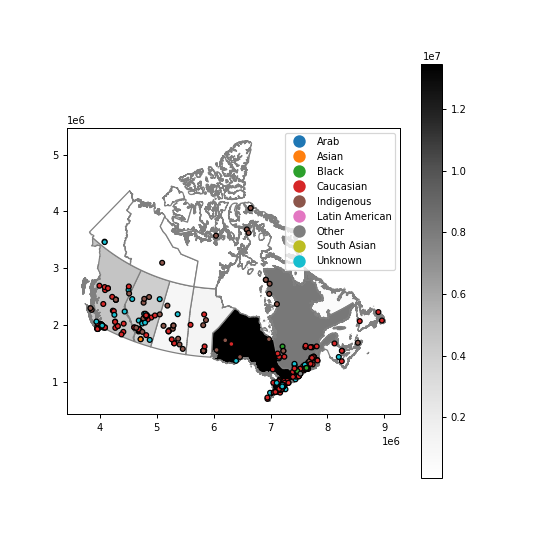

In [308]:
# We can use .to_crs() to create a police killings layer with the same projection as the provinces layer.
police_Killings = police_Killings.to_crs(Provincial_Data.crs)

# Now, we can create a figure using matplotlib (plt), first we define the figure and the size
fig,axes=plt.subplots(
    figsize=(6,6)
)

# Now we can add the provinces using the .plot() function.  We set the plotting axes and give it a grey color
cb = Provincial_Data.plot(
    ax=axes,
#     alpha=.5,
    column='Total',
    cmap = 'Greys',
    edgecolor='grey',
    legend=True,
)

# Then we add the police_Killings_LCC.  We'll set the column to 'race', so we can disply by race,
# give the point markers a few more parameters, and add them to a legend
police_Killings.plot(
    ax=axes,
    column='race',
    edgecolor='k',
    markersize=15,
    legend=True,
    legend_kwds={'loc': 'upper right','fontsize':8}
)

### And now you've made your first map with python!

* But its an ugly map :(
    * It doesn't look great.  This is just the quick and dirty way to look ata data
    * To make things more presentable, we'll have to be more explicit in setting up our map.  But that's a task for later.


### For now, lets move on and look at the dataset in more detail.

* Pandas & Geopandas have some nice features to quickly summarize our dataset.



* We can use .count() to get the total # incidents.
    * Callling .count() as is, will give us a list of all the columns, and a count for each.  We can see most collumns are "full" but in the "geocoding_Notes" column, we can see that 4 points don't have coordinates associated with their address.  This suggests there was an error in the data entry process.  We don't need to worry about this though.    

In [309]:
police_Killings.count()

date                             462
date.1                           462
day_week                         462
prov                             462
city_town                        462
postal_code                      462
location_type                    462
id_victim                        462
Name                             462
age                              455
gender                           462
race                             462
ethnic_ancestry                  107
immigrant_refugee_naturalized    462
armed_type                       462
cause_death                      462
taser_deployed                   462
injured_officer                  462
excited_delirium                 462
mentral_distress_disorder        462
substance_abuse                  462
summary                          462
Department                       462
charge_type                      462
Charges                          462
Officers Involved                462
latitude                         458
l

* We can use .mean(), .min(), etc. followed by ['age'] to get some vital statistics on the age of victims.

In [310]:
print('Age Distribution of Victims')
print()
print('Mean:                ',
      police_Killings.mean()['age']
     )
print()
print('Standard Deviation:  ',
      police_Killings.std()['age']
     )
print()
print('Youngest:            ',
      police_Killings.max()['age']
     )
print()
print('Oldest:              ',
      police_Killings.min()['age']
     )

Age Distribution of Victims

Mean:                 36.73186813186813

Standard Deviation:   11.775739256991544

Youngest:             77.0

Oldest:               15.0


### We can resample our data to look for trends
* The date column is a special type of data that allows us to resample our data by year, month, etc
* The dataset has to be in order by date for this to work (we did this alread).

<IPython.core.display.Javascript object>


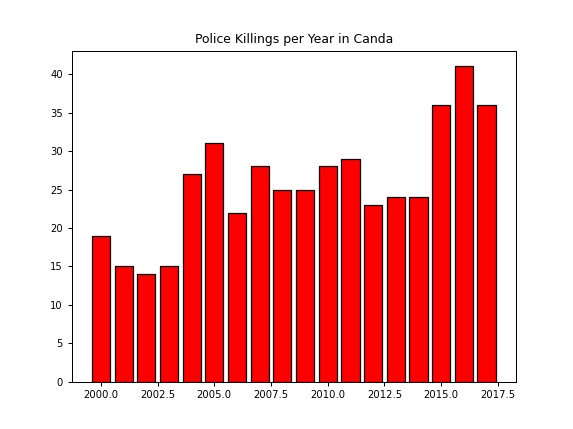

Text(0.5, 1.0, 'Police Killings per Year in Canda')

In [311]:
Resampled = police_Killings.set_index('date').resample('Y').count()


plt.figure()
plt.bar(
    Resampled.index.year,
    Resampled['id_victim'],
    edgecolor='black',
    facecolor='#FF0000'
)
plt.title('Police Killings per Year in Canda')

### We can group our data to look for patterns too.

* the .groupby() function can accept one or multple paramters to group our dataset by.
    * This allows us to create complex queries if we want.
* We can have to follow up with .count(), .mean(), etc.
    * This tells us "how" to aggregate

<IPython.core.display.Javascript object>


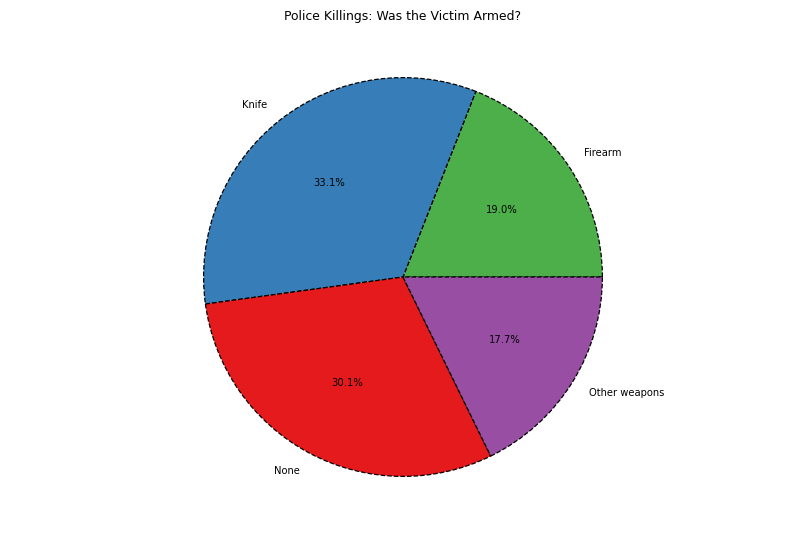

In [312]:
fig,ax = plt.subplots(figsize=(9,6))

Pie_Colors = {'None':'#e41a1c',
              'Knife':'#377eb8',
              'Firearm':'#4daf4a',
              'Other weapons':'#984ea3'}

Armed = police_Killings.groupby(['armed_type']).count()
ax.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    colors=[Pie_Colors[i] for i in Armed.index],
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
ax.set_title('Police Killings: Was the Victim Armed?')
plt.tight_layout()

In [313]:
police_Killings.groupby(['gender','mentral_distress_disorder']).count()

date  date.1  day_week  prov  city_town  \
gender mentral_distress_disorder                                            
Female No                            1       1         1     1          1   
       Unknown                       7       7         7     7          7   
       Yes                           6       6         6     6          6   
Male   No                           34      34        34    34         34   
       Unknown                     227     227       227   227        227   
       Yes                         187     187       187   187        187   

                                  postal_code  location_type  id_victim  Name  \
gender mentral_distress_disorder                                                
Female No                                   1              1          1     1   
       Unknown                              7              7          7     7   
       Yes                                  6              6          6     6   
Male   No                                  34             34         34    34   
       Unknown                            227            227        227   227   
       Yes                                187            187        187   187   

                                  age  ...  substance_abuse  summary  \
gender mentral_distress_disorder       ...                             
Female No                           1  ...                1        1   
       Unknown                      7  ...                7        7   
       Yes                          6  ...                6        6   
Male   No                          34  ...               34       34   
       Unknown                    221  ...              227      227   
       Yes                        186  ...              187      187   

                                  Department  charge_type  Charges  \
gender mentral_distress_disorder                                     
Female No                                  1            1        1   
       Unknown                             7            7        7   
       Yes                                 6            6        6   
Male   No                                 34           34       34   
       Unknown                           227          227      227   
       Yes                               187          187      187   

                                  Officers Involved  latitude  longitude  \
gender mentral_distress_disorder                                           
Female No                                         1         1          1   
       Unknown                                    7         7          7   
       Yes                                        6         6          6   
Male   No                                        34        33         33   
       Unknown                                  227       225        225   
       Yes                                      187       186        186   

                                  geocoding_Notes  geometry  
gender mentral_distress_disorder                             
Female No                                       0         1  
       Unknown                                  0         7  
       Yes                                      0         6  
Male   No                                       1        34  
       Unknown                                  2       227  
       Yes                                      2       187  

[6 rows x 28 columns]

### We're intersted in a specific question.  What's the distribution of police killings by race?


In [314]:
police_Killings.groupby(['race']).count()['date'].sort_values()

race
Latin American      3
Arab                5
Other               5
South Asian        10
Asian              15
Black              43
Indigenous         70
Unknown            99
Caucasian         212
Name: date, dtype: int64

# Step 4) Normalizing our Data

* The racial demographics of Canada aren't evenly split however!

* We need to Normalize our data by population statistics.

* Lets look at our census data again


In [315]:
Provincial_Data[Census_Tabular.columns]

,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Caucasian
PRUID,,,,,,,,,,,,,,,,
10,NL,519716,2645,2325,2350,1385,635,1375,335,220,75,60,145,255,45725,462186
11,PE,142907,925,2570,825,670,255,585,145,215,210,110,50,85,2735,133527
12,NS,923598,7905,8645,21910,3400,1685,8115,1195,1540,1540,695,635,1390,51490,813453
13,NB,747101,2535,3925,6995,1975,1285,2960,1230,735,1685,230,300,680,29380,693186
24,QC,8164361,90335,99505,319230,34910,133920,213740,62825,32405,8055,4575,9840,23040,182890,6949091
35,ON,13448494,1150415,754545,627715,311670,195955,210435,133860,154670,88940,30835,97970,128590,374395,9188499
46,MB,1278365,42060,22540,30340,79820,9895,5030,8565,2695,4375,1850,3200,6480,223310,838205
47,SK,1098352,29965,15540,14925,32340,4190,4300,5740,2070,1880,955,1145,2815,175020,807467
48,AB,4067175,230925,158200,129395,166200,55085,56700,43985,20980,21275,12165,9905,28355,258640,2875365


### The first row contains the total values for the whole country.  We can use this to calculate a police killing rate.

* But the Canadian Census' racial categories don't match up perfectly with the police violence dataset's racial
* How can we work around this?
    * We have the largest three groups in the police killing set: White, Indigenous, and Black.  So we can work with them as is
    * The other races make up a small portion of total killings.  And we can't be entirely sure how the CBC defined their groupings.  So, lets add a new category: "Other Minorities"
    
* We'll do this for both the provincial boundaires and the police_Killings
    * For the police killings, we'll leave the unknow records alone

In [316]:
Other_Minorities=['South Asian', 'Chinese', 'Filipino','Latin American',
 'Arab', 'Southeast Asian', 'West Asian', 'Korean',
'Japansese', 'Visible minority, n.i.e', 'Mixed']
Provincial_Data['Other Minorities']=Provincial_Data[Other_Minorities].sum(axis=1)

Other_Minorities=['Latin American', 'Arab', 'Other', 'South Asian', 'Asian']
police_Killings['race'] = police_Killings['race'].replace(to_replace=Other_Minorities,value='Other Minorities')


# From here, we can calculate the Police Killing Rate (PKR).

* Dividing the total number of killings by the population gives us ...

In [317]:
Races = ['Indigenous','Black','Caucasian','Other Minorities']
Race_Breakdown = police_Killings.groupby(['race']).count()['id_victim']
Can_Pop = Provincial_Data[Races].sum()

Racial_Rates = Race_Breakdown.T[Races]/Can_Pop
# Racial_Rates['Average']=Race_Breakdown.T[Races].sum()/Can_Pop.sum()
print(Racial_Rates)
# police_Killings.groupby(['race']).count()['date'].sort_values()

race
Indigenous          0.000042
Black               0.000036
Caucasian           0.000008
Other Minorities    0.000006
dtype: float64


### This number isn't that meaningful though.  It represents the number of killings "per person" over the whole study period.

# 

* Lets convert the rate to a more meaninful unit.  Killings / Million Residents / Year

* The date record is a "date" object.
* It has some added functionality like being able to query the the year, month, day

### How might we calculate our police killing rate?

In [318]:
First_Year = police_Killings['date'].min().year
Last_Year = police_Killings['date'].max().year
print(First_Year,Last_Year)

2000 2017


<IPython.core.display.Javascript object>


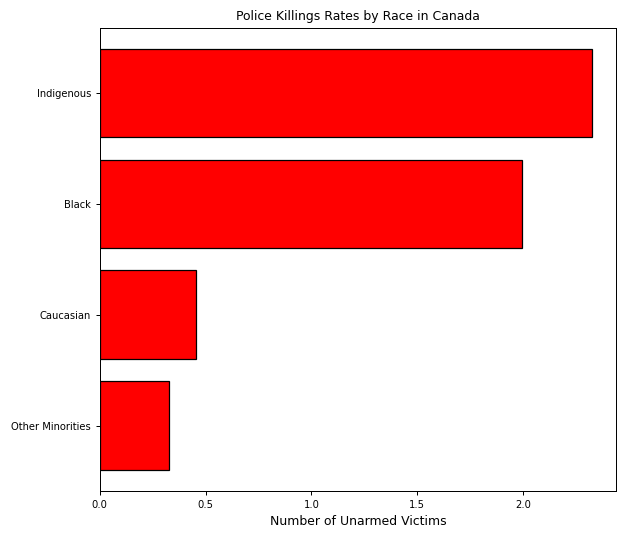

In [319]:

Scale = 1e6
Duration = 18
rate_Conversion = Scale / Duration

Racial_Rates=Racial_Rates.sort_values(ascending=True)

fig, ax = plt.subplots(figsize = (7,6))
ax.barh(
    Racial_Rates.index,
    Racial_Rates.values * rate_Conversion,
    facecolor='#FF0000',
    edgecolor='black',
    linewidth=1
)
ax.set_title('Police Killings Rates by Race in Canada')
ax.set_xlabel('Killings per Year per Million People')
plt.tight_layout()

# The Police killing rates are 5x higher for Indigenous people and 4x higher for Black people than it is fo White people.

* ## This is an abhorent example of systemic racism in Canadian Policing.


# Lets look at the PKR
Now we  want to normalize by provincial demographics.

* We have a few more steps to go through first.
    * The police killings and census data use different abbreviations.  To do a join our dataset with the census data we'll need to assign an new abbreviaton
    * We'll us a dictionary to do this
    
    
* Then we can summarize the killings by province and join it to the Provinces_Join layer

* Now we can summarize the killings by province and join it to the Provinces_Join layer


* Note Prince Edward Island doesn't have any.

In [320]:

race_by_Province = police_Killings.groupby(['prov','race']).count()
race_by_Province = race_by_Province['date'].unstack()
race_by_Province['Total'] = race_by_Province.sum(axis=1)


for col in Races:
    Provincial_Data = Provincial_Data.join(race_by_Province[col],on='prov',rsuffix='_Killings')

for col in ['Unknown','Total']:
    Provincial_Data = Provincial_Data.join(race_by_Province[col],on='prov',rsuffix='_Killings')
Provincial_Data

# Some provines/groups don't have any records.  Those are given NaN values, and need to be repalced with zeros
Provincial_Data[[x+'_Killings' for x in Races]]=Provincial_Data[[x+'_Killings' for x in Races]].fillna(0)
Provincial_Data['Total_Killings']=Provincial_Data['Total_Killings'].fillna(0)
Provincial_Data[['Unknown' for x in Races]].fillna(0)

Provincial_Data.head()

,PRNAME,geometry,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,...,Mixed,Indigenous,Caucasian,Other Minorities,Indigenous_Killings,Black_Killings,Caucasian_Killings,Other Minorities_Killings,Unknown,Total_Killings
PRUID,,,,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL,519716,2645,2325,2350,1385,635,1375,...,255,45725,462186,9455,0.0,0.0,3.0,0.0,NaN,3.0
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366...",PE,142907,925,2570,825,670,255,585,...,85,2735,133527,5820,0.0,0.0,0.0,0.0,NaN,0.0
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717...",NS,923598,7905,8645,21910,3400,1685,8115,...,1390,51490,813453,36745,1.0,0.0,2.0,0.0,NaN,3.0
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763...",NB,747101,2535,3925,6995,1975,1285,2960,...,680,29380,693186,17540,0.0,0.0,3.0,0.0,1.0,4.0
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC,8164361,90335,99505,319230,34910,133920,213740,...,23040,182890,6949091,713150,8.0,8.0,53.0,3.0,15.0,87.0


# Step 5) Calcualte the police killing rate (PKR) on the provincial level
* Nunavut has a huge problem.  Its not a conicidence that the population is 75% Inuit.

<IPython.core.display.Javascript object>


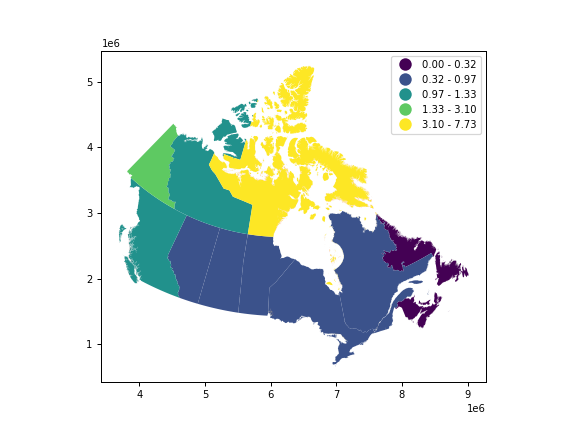

In [321]:
Provincial_Data['PKR']=(Provincial_Data['Total_Killings']/Provincial_Data['Total']*rate_Conversion).round(2)
Provincial_Data.plot(column='PKR',legend=True,scheme='naturalbreaks')

# Step 6) Calculate a Police Killings Discrimination Index (PKDI):

* For this, we'll compare the PKR for white people to the combined PKR of black and indigenous people

* We'll use the following equations:


\begin{align}
\ PKR_{W} & = (\frac{White Killings}{White Population}) * 1e6 / 18\\
\end{align}

\begin{align}
\ PKR_{BI} & = (\frac{Black Killings + Indigenous Killings}{Black Population + Indigenous Population}) * 1e6 / 18
\end{align}

\begin{align}
\ PKDI & = PKR_{BI} - PKR_{W}\\
\end{align}

## This will hightlight the disparities in police killings
* We'll classify the data using the following scheme:
    
        * "Low Bias": -0.5 to 0.5 - This is the rate killings of whites.  Within these ranges, differences might be due to presence or lacktherof of a certain groups 
        * "Moderate Bias": 0.5 to 1 - Greater than the white rate, less than the national average
        * "Severe Bias": 1 to 3 - Greater than the national rate, less than the indigenouos rate
        * "Extreme Bias: 3 to 10 - Greater than the national indigenous rate
    

In [331]:
Provincial_Data['PKR_W']=Provincial_Data['Caucasian_Killings']/Provincial_Data['Caucasian']*rate_Conversion
Provincial_Data['PKR_BI']=(Provincial_Data['Indigenous_Killings']+Provincial_Data['Black_Killings'])/(Provincial_Data['Indigenous']+Provincial_Data['Black'])*rate_Conversion

Provincial_Data['PKDI'] = Provincial_Data['PKR_BI'] - Provincial_Data['PKR_W']

Provincial_Data['PKDI']=Provincial_Data['PKDI'].fillna(0)


bins = [-0.5,0.5,1,2,10.0]
labels = ['Low Bias','Moderate Bias','Severe Bias','Extreme Bias']
Provincial_Data['PKDI_Classes']=(pd.cut(Provincial_Data['PKDI'],bins=bins,labels=labels)).astype('str')

Provincial_Data.round(2)

# print(Provincial_Data[['prov','PKDI','PKDI_Classes']].sort_values(by='PKDI').round(2))

,PRNAME,geometry,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,...,Caucasian_Killings,Other Minorities_Killings,Unknown,Total_Killings,PKR,PKR_W,PKR_BI,PKDI,PKDI_Classes,PKR_Classes
PRUID,,,,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL,519716,2645,2325,2350,1385,635,1375,...,3.0,0.0,NaN,3.0,0.32,0.36,0.00,-0.36,Low Bias,<0.5
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366...",PE,142907,925,2570,825,670,255,585,...,0.0,0.0,NaN,0.0,0.00,0.00,0.00,0.00,Low Bias,<0.5
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717...",NS,923598,7905,8645,21910,3400,1685,8115,...,2.0,0.0,NaN,3.0,0.18,0.14,0.76,0.62,Moderate Bias,<0.5
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763...",NB,747101,2535,3925,6995,1975,1285,2960,...,3.0,0.0,1.0,4.0,0.30,0.24,0.00,-0.24,Low Bias,<0.5
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC,8164361,90335,99505,319230,34910,133920,213740,...,53.0,3.0,15.0,87.0,0.59,0.42,1.77,1.35,Severe Bias,0.5 - 1
35,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",ON,13448494,1150415,754545,627715,311670,195955,210435,...,65.0,17.0,33.0,152.0,0.63,0.39,2.05,1.66,Severe Bias,0.5 - 1
46,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60395...",MB,1278365,42060,22540,30340,79820,9895,5030,...,6.0,1.0,NaN,19.0,0.83,0.40,2.63,2.23,Extreme Bias,0.5 - 1
47,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5294993.103...",SK,1098352,29965,15540,14925,32340,4190,4300,...,4.0,0.0,2.0,17.0,0.86,0.28,3.22,2.94,Extreme Bias,0.5 - 1
48,Alberta,"POLYGON ((5228304.177 2767597.891, 5087063.606...",AB,4067175,230925,158200,129395,166200,55085,56700,...,29.0,7.0,22.0,71.0,0.97,0.56,1.86,1.30,Severe Bias,0.5 - 1


### Lets map the patterns

<IPython.core.display.Javascript object>


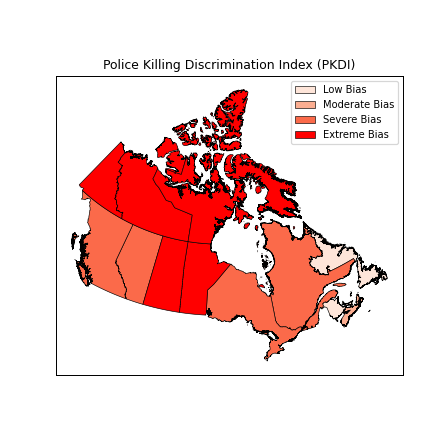

Text(0.5, 1.0, 'Police Killing Discrimination Index (PKDI)')

In [332]:
fig,ax1=plt.subplots(figsize=(5,5))
# colors=['#ffffb2',
# '#fecc5c',
# '#fd8d3c',
# '#e31a1c']

colors = ['#fee5d9','#fcae91','#fb6a4a','#FF0000']
# colors = ['#fee5d9','#fcae91','#fb6a4a','#cb181d']
PKDI_Color = {key:value for key,value in zip(labels,colors)}

Patches = []
for pkdi_class in Provincial_Data['PKDI_Classes'].unique():
    kwargs = {'facecolor':PKDI_Color[pkdi_class],
             'edgecolor':'black',
              'linewidth':.5,
             'label':pkdi_class}
    Provincial_Data.loc[Provincial_Data['PKDI_Classes']==pkdi_class].plot(
        ax=ax1,
        **kwargs
             )
    Patches.append(mpatches.Patch(**kwargs))
    
ax1.legend(handles=Patches,) 
# ax1.get_legend().set_title('PKDI',loc='left') 
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title('Police Killing Discrimination Index (PKDI)')

# Step 7) Create a detailed infographic on police violence in Canada

* Matplotlib alows us to be very specific in determining our layout with gridspec.


* We can create a large plot and define specifically what we want.


* We'll have two maps, showing the PKR and the PKDI on the left


* Then we'll add some smaller plots on the right showing the annual trend, national PKR by race, and some pie charts


* We can set our default ontsize for consistency

<IPython.core.display.Javascript object>


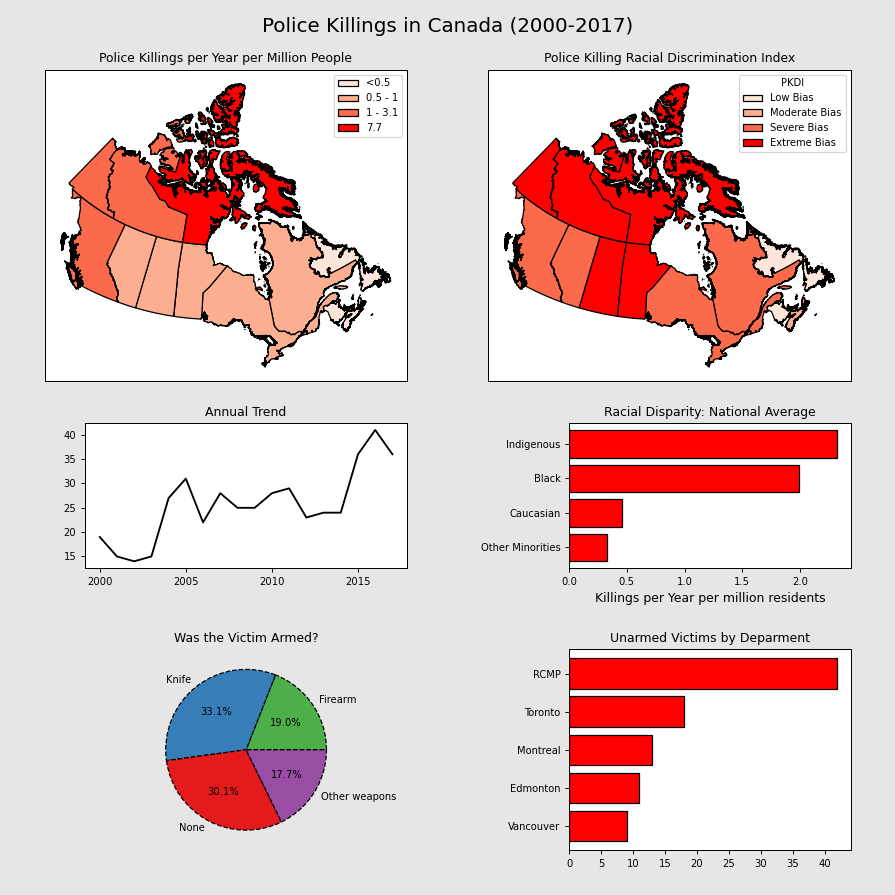

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


Text(0.5, 0.98, 'Police Killings in Canada (2000-2017)')

In [382]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



fig = plt.figure(figsize=(10,10),constrained_layout=True)
gs = fig.add_gridspec(100,100)
# gs.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

PKR_Map = fig.add_subplot(gs[0:45 , 0:45])
PKDI_Map = fig.add_subplot(gs[0:45, 55:])


# PKR_Map2 = fig.add_subplot(gs[55: , 0:45])
# PKDI_Map2 = fig.add_subplot(gs[55:, 55:])

# SourceStatement = fig.add_subplot(gs[105:, 0:40])

Annual_Trend = fig.add_subplot(gs[47:65, 5:45])
Armed_Stats = fig.add_subplot(gs[75:100, 5:45])
PKR_national = fig.add_subplot(gs[47:65, 65:])
Dept_Stats = fig.add_subplot(gs[75:100, 65:])
# Dept_Stats = fig.add_subplot(gs[105:, 65:])


plt.subplots_adjust(left=.05, bottom=.05, right=.95, top=.95, wspace=.1, hspace=.1)

fig.patch.set_facecolor([.9,.9,.9])
plt.suptitle('Police Killings in Canada (2000-2017)')

# print(Provincial_Data['PKR'])

### Now we can add things to the figure
* First lets do the maps

In [383]:
# Provincial_Data['PKR']=Provincial_Data['PKR'].fillna(0)
bins = [-0.01,0.5,1,4,9]
labels = ['<0.5','0.5 - 1','1 - 3.1','7.7']
colors = ['#fee5d9','#fcae91','#fb6a4a','#FF0000']
PKR_Color = {key:value for key,value in zip(labels,colors)}

Provincial_Data['PKR_Classes']=(pd.cut(Provincial_Data['PKR'],bins=bins,labels=labels)).astype('str')


Patches=[]
for pkr_class in Provincial_Data['PKR_Classes'].unique():
    kwargs = {'facecolor':PKR_Color[pkr_class],
             'edgecolor':'k',
             'label':pkr_class}
    Provincial_Data.loc[Provincial_Data['PKR_Classes']==pkr_class].plot(
        ax=PKR_Map,
        **kwargs
             )
    Patches.append(mpatches.Patch(**kwargs))
PKR_Map.legend(handles=Patches) 
# PKR_Map.get_legend().set_title('') 
PKR_Map.get_xaxis().set_visible(False)
PKR_Map.get_yaxis().set_visible(False)
PKR_Map.set_title('Police Killings per Year per Million People')

# Loop through the PKDI_Classes to plot & assign colors
Patches = []
for pkdi_class in Provincial_Data['PKDI_Classes'].unique():
    kwargs = {'facecolor':PKDI_Color[pkdi_class],
             'edgecolor':'k',
             'label':pkdi_class}
    Provincial_Data.loc[Provincial_Data['PKDI_Classes']==pkdi_class].plot(
        ax=PKDI_Map,
        **kwargs
             )
    Patches.append(mpatches.Patch(**kwargs))
    
PKDI_Map.legend(handles=Patches,) 
PKDI_Map.get_legend().set_title('PKDI') 
PKDI_Map.get_xaxis().set_visible(False)
PKDI_Map.get_yaxis().set_visible(False)
PKDI_Map.set_title('Police Killing Racial Discrimination Index')


Annual_Trend.plot(
    Resampled.index.year,
    Resampled['id_victim'],
    color='black',
#     facecolor='#FF0000'
)
Annual_Trend.set_title('Annual Trend')
Annual_Trend.set_xticks([2000,2005,2010,2015])

PKR_national.barh(
    Racial_Rates.index,
    Racial_Rates.values * rate_Conversion,
    facecolor='#FF0000',
    edgecolor='black',
    linewidth=1
)
PKR_national.set_title('Racial Disparity: National Average')
PKR_national.set_xlabel('Killings per Year per million residents')

Armed = police_Killings.groupby(['armed_type']).count()
Armed_Stats.pie(
    Armed['id_victim'],
    labels=Armed.index,
    colors=[Pie_Colors[i] for i in Armed.index],
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
Armed_Stats.set_title('Was the Victim Armed?')
# plt.tight_layout()


Force = police_Killings.groupby(['Department','armed_type']).count()['id_victim']#.sort_values(ascending=True)

Force=Force.unstack()
col = Force.columns
Force['Total']=Force.sum(axis=1)
# for c in col:
#     Force[c] /= Force['Total']

Force = Force.sort_values(by='Total',ascending=False)#
Force = Force.loc[Force['Total']>20,'None'].sort_values()[-5:]
# print(Force)

Force_Labels={'Toronto Police Service':'Toronto',
              'RCMP':'RCMP',
              'Vancouver Police Department':'Vancouver',
              'Service de police de la Ville de Montreal':'Montreal',
              'Edmonton Police Service':'Edmonton'}

Dept_Stats.barh(Force.index,Force.values,facecolor='#FF0000',edgecolor='black')
Dept_Stats.set_yticklabels([Force_Labels[f] for f in Force.index.values])
Dept_Stats.set_title('Unarmed Victims by Deparment')
# Dept_Stats.set_xlabel('Number of Unarmed Victims')

Descriptor = \
'''The Police Killing Discrimination Index (PKDI) quantifies
the disparitiy in police killing rates between
Black and Idigenous people and White people in Canada.
The PKDI is deined as:

PKDI = PKR$_{Black+Indigenous}$-PKR$_{White}$

Infographic Created by June Skeeter
Police Killing data collected by the CBC
Demographics data is from Stats Canada'''

# Descriptor = 'Kitties'
SourceStatement.set_axis_off()
SourceStatement.text(0, 0.5, 
                     Descriptor,
                     horizontalalignment='left',
                     verticalalignment='center',
                    )

# plt.tight_layout(pad=0)
plt.savefig('InfoGraphic.png',facecolor=fig.get_facecolor(),edgeolor='k')

# Save the data so we can use it in the future
* We're going to save it as a shapefile for use with geopandas or a desktop GIS
* We're also going to save it as a "GeoJSON" file.  This datatype is well suited for webmapping.  Which I cover in a dfferent workshp!

In [326]:
Provincial_Data.to_file('Data/Provincial_Police_Violence.shp')

# police_Killings = police_Killings.to_crs('epsg:4326')
# Temp=police_Killings[['prov','race','armed_type','age','mentral_distress_disorder','geometry']]
# print(Temp.head())
# Temp.to_file("Data/PoliceKillings.json", driver = "GeoJSON")